# Análisis Exploratorio de Datos (EDA)

Este análisis exploratorio tiene como objetivo comprender la estructura y comportamiento del dataset limpio que será utilizado para entrenar un modelo de detección de intrusiones basado en inteligencia artificial (IDS). El dataset contiene tráfico de red etiquetado como benigno o malicioso, y ha sido previamente procesado para eliminar valores nulos, duplicados y normalizar las variables numéricas.

A través de este análisis, se busca:

- Identificar distribuciones de variables clave
- Evaluar el balance de clases (ataques vs tráfico normal)
- Detectar relaciones entre características mediante correlación
- Obtener una base sólida para el entrenamiento del modelo

---

## Índice de Secciones

1. [Carga del Dataset e Información General](#1-carga-del-dataset-e-información-general)
2. [Resumen Estadístico del Dataset](#2-resumen-estadístico-del-dataset)
3. [Distribución de Clases (Label)](#3-distribución-de-clases-label)
4. [Matriz de Correlación](#4-matriz-de-correlación)
5. [Distribución de Características Clave](#5-distribución-de-características-clave)
6. [Boxplots](#6-Boxplots)

---

Cada sección incluye el código correspondiente en Python y una explicación detallada para facilitar la interpretación de los resultados.


## 1. Carga del Dataset e Información General

En este primer paso, cargamos el dataset limpio que contiene datos de tráfico de red previamente preprocesados. Utilizamos la función `df.info()` para obtener una visión general de la estructura del dataset:

- Número de filas y columnas
- Nombres de las columnas
- Tipo de datos de cada columna
- Cantidad de valores no nulos por columna

Esto nos permite detectar si aún existen valores nulos, qué tipo de variables tenemos (enteras, flotantes, categóricas) y si el dataset está listo para su análisis.


In [19]:
import pandas as pd

# Cargar el dataset limpio
df = pd.read_csv("../archive/cleaned_dataset.csv") 

columnas_visibles = [
    'Destination Port',
    'Flow Duration',
    'Total Fwd Packets',
    'Total Backward Packets',
    'Total Length of Fwd Packets',
    'Total Length of Bwd Packets',
    'Flow Bytes/s',
    'Flow Packets/s',
    'Fwd Packet Length Mean',
    'Bwd Packet Length Mean',
    'Fwd PSH Flags',
    'Bwd PSH Flags',
    'SYN Flag Count',
    'ACK Flag Count',
    'Init_Win_bytes_forward',
    'Init_Win_bytes_backward',
    'Idle Mean',
    'Idle Max',
    'Label'
]
print("\n### Vista previa de las columnas seleccionadas:")
print(df[columnas_visibles].head())

print("\n### Información general del dataset:")
df.info()




### Vista previa de las columnas seleccionadas:
   Destination Port  Flow Duration  Total Fwd Packets  Total Backward Packets  \
0             54865      -0.519057          -0.187328               -0.210766   
1             55054      -0.519054          -0.251803               -0.165063   
2             55055      -0.519056          -0.251803               -0.165063   
3             46236      -0.519056          -0.251803               -0.165063   
4             54863      -0.519057          -0.187328               -0.210766   

   Total Length of Fwd Packets  Total Length of Bwd Packets  Flow Bytes/s  \
0                    -0.287007                    -0.152861      0.203427   
1                    -0.288843                    -0.152709     -0.026117   
2                    -0.288843                    -0.152709     -0.018996   
3                    -0.288843                    -0.152709     -0.011787   
4                    -0.287007                    -0.152861      0.203427   

 

## 2. Resumen Estadístico del Dataset

En esta sección se utiliza el método `df.describe()` para generar un resumen estadístico de las variables numéricas del dataset. Esta función proporciona estadísticas como:

- **count**: número de valores no nulos
- **mean**: media
- **std**: desviación estándar
- **min / max**: valores mínimo y máximo
- **25%, 50%, 75%**: cuartiles

Este análisis permite identificar la escala de las variables, su dispersión y posibles valores atípicos que podrían influir en el rendimiento del modelo.


In [20]:
# Mostrar resumen estadístico del dataset
df.describe()


,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Fwd URG Flags,Bwd URG Flags,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count
count,169510.000000,169510.000000,169510.000000,169510.000000,169510.000000,169510.000000,169510.000000,169510.000000,169510.000000,169510.000000,...,169510.0,169510.0,169510.000000,169510.000000,169510.000000,169510.000000,169510.000000,169510.000000,169510.0,169510.000000
mean,0.058774,-0.010266,-0.008552,0.012820,0.005273,0.017500,-0.007490,0.019348,0.019454,0.119975,...,0.0,0.0,0.001009,0.030795,0.000035,0.367146,0.540198,0.146080,0.0,0.000035
std,1.028247,0.786036,0.781509,1.031293,0.808007,1.044348,1.017332,1.045475,1.045356,1.040336,...,0.0,0.0,0.031746,0.172761,0.005949,0.482028,0.498383,0.353187,0.0,0.005949
min,-0.519057,-0.251803,-0.210766,-0.290680,-0.152861,-0.290559,-0.169883,-0.327923,-0.271206,-0.744776,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,-0.513396,-0.122853,-0.165063,-0.282722,-0.152861,-0.287358,-0.169883,-0.316103,-0.271206,-0.744776,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,-0.460761,-0.122853,-0.027954,-0.282722,-0.147385,-0.279888,-0.169883,-0.310850,-0.264151,-0.710594,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
75%,-0.205486,0.006097,0.063453,-0.273539,0.141251,-0.279888,-0.133352,-0.310850,-0.258405,0.827037,...,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.000000
max,3.271159,112.966561,134.248085,36.678798,130.977947,5.941202,8.792398,7.289865,8.076189,2.398849,...,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


## 3. Distribución de Clases (Label)

En este paso analizamos cómo están distribuidos los registros entre las dos clases del dataset:

- **Clase 0**: Tráfico benigno
- **Clase 1**: Tráfico malicioso (ataques)

Este análisis es fundamental para detectar si existe un **desbalance de clases**, lo cual puede afectar negativamente el entrenamiento del modelo. Si una clase tiene muchas más muestras que la otra, el modelo puede sesgarse y predecir mayormente la clase mayoritaria.

Se incluye también el porcentaje que representa cada clase para tener una visión más clara del equilibrio entre ambas.


/tmp/ipykernel_8125/2704683391.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Label"], palette="Set2")


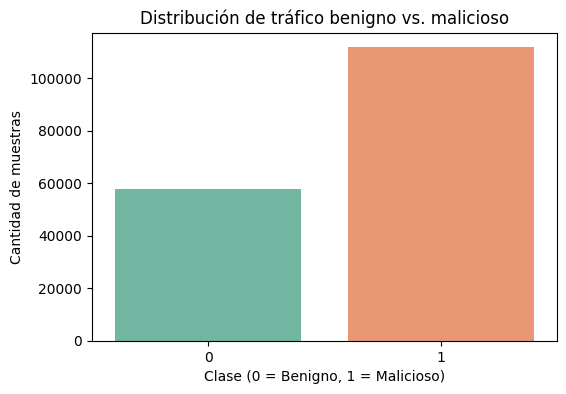


Porcentaje por clase:
 Label
1    65.904666
0    34.095334
Name: proportion, dtype: float64


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de la variable objetivo (Label)
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Label"], palette="Set2")
plt.title("Distribución de tráfico benigno vs. malicioso")
plt.xlabel("Clase (0 = Benigno, 1 = Malicioso)")
plt.ylabel("Cantidad de muestras")
plt.show()

# Porcentaje por clase
porcentajes = df["Label"].value_counts(normalize=True) * 100
print("\nPorcentaje por clase:\n", porcentajes)


### Análisis de Resultados

El dataset presenta una distribución de clases relativamente equilibrada:

- **57.38% de tráfico malicioso (1)**
- **42.62% de tráfico benigno (0)**

Esta proporción es adecuada para entrenar un modelo de clasificación, ya que no existe un desbalance extremo entre clases. Esto es especialmente importante en problemas de detección de intrusiones, donde un alto desbalance podría causar que el modelo aprenda a predecir únicamente la clase mayoritaria.

Con esta distribución:

- El modelo podrá aprender patrones tanto del tráfico benigno como del malicioso.
- No es necesario aplicar técnicas de rebalanceo como SMOTE o undersampling.
- Las métricas como **recall** y **F1-score** serán más representativas del rendimiento real.

En resumen, la proporción actual entre clases es favorable para el desarrollo del modelo de detección de intrusiones.


## 4. Matriz de Correlación entre Variables

La matriz de correlación permite identificar la relación entre variables numéricas del dataset. Cada valor en la matriz representa el grado de correlación entre dos características:

- Valores cercanos a **1** indican una **correlación positiva fuerte**
- Valores cercanos a **-1** indican una **correlación negativa fuerte**
- Valores cercanos a **0** indican **poca o ninguna correlación**

Este análisis es útil para:

- Detectar variables redundantes (altamente correlacionadas) que podrían ser eliminadas.
- Identificar relaciones interesantes entre características que puedan ser útiles para el modelo.
- Evitar colinealidad excesiva en modelos sensibles a correlaciones como regresión logística.

La matriz se visualiza con un mapa de calor (*heatmap*) que resalta las correlaciones más fuertes en rojo o azul según su signo.


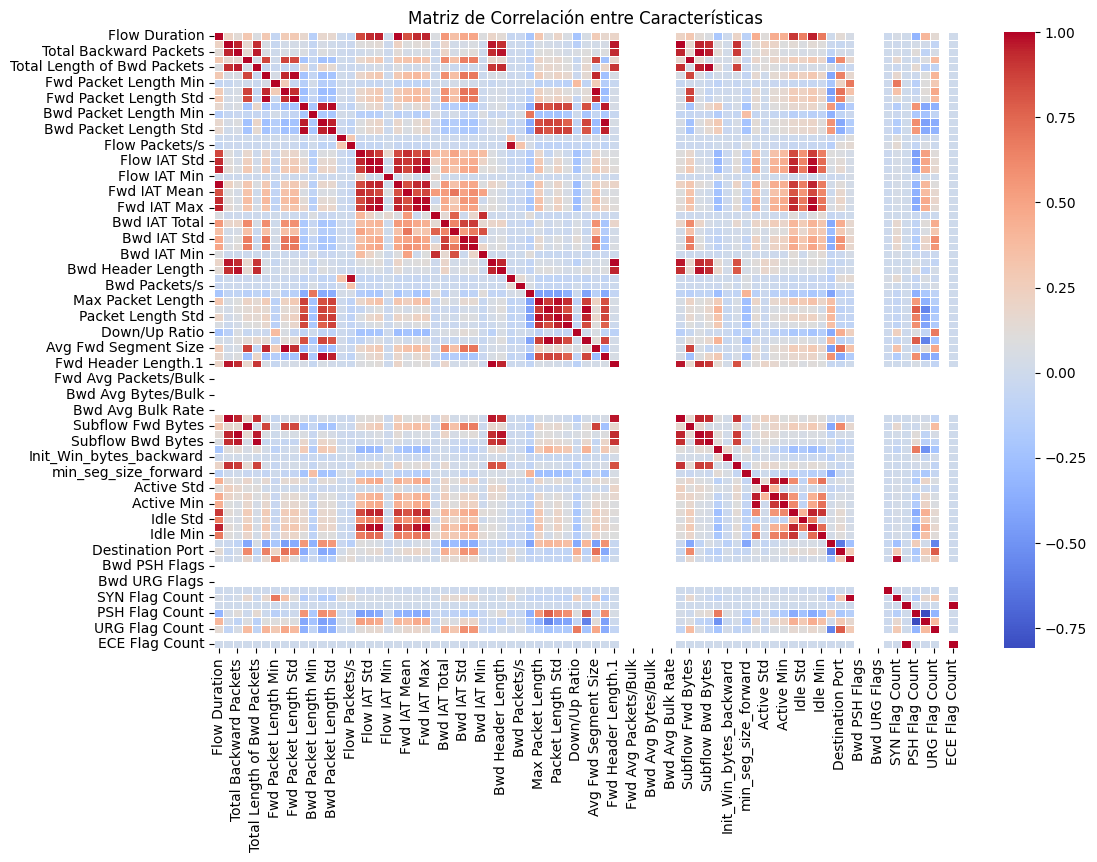

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular matriz de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr(numeric_only=True)

# Visualizar la matriz de correlación
sns.heatmap(correlation_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación entre Características")
plt.show()


### Análisis del Output de la Matriz de Correlación

Al observar la matriz de correlación generada, se pueden destacar los siguientes puntos clave:

1. **Distribución general de correlaciones**

   La mayoría de los valores de correlación entre características se encuentran en rangos bajos o moderados, lo cual es positivo. Esto sugiere que no hay redundancia excesiva entre variables, lo que favorece una mayor diversidad de información para el modelo.

2. **Presencia de grupos altamente correlacionados**

   Se detectan varios grupos de variables con correlación alta entre sí. Específicamente:

   - Las variables relacionadas con paquetes `Fwd` (adelante) y `Bwd` (atrás) presentan fuertes correlaciones entre sus versiones máximas, mínimas y medias.
   - También se aprecia una correlación notable entre `Packet Length Mean` y `Packet Length Variance`, lo cual es lógico, ya que ambas describen el comportamiento del tamaño de los paquetes.

   Estas correlaciones son esperadas, ya que muchas de estas características derivan de la misma fuente de información. Aunque no es estrictamente necesario eliminarlas, podrían ser consideradas redundantes en modelos más simples o cuando se aplique reducción de dimensionalidad.

3. **Relación con la variable objetivo (`Label`)**

   La columna correspondiente a `Label` no muestra correlaciones fuertes con ninguna variable individual. Esto indica que ninguna característica por sí sola es suficiente para predecir el tipo de tráfico. Esta falta de correlación directa justifica el uso de modelos de aprendizaje automático, capaces de detectar patrones más complejos y combinaciones de múltiples variables.

### Conclusión

El análisis de la matriz de correlación confirma que el dataset contiene una buena variedad de variables no redundantes, con relaciones lógicas entre características relacionadas. La baja correlación directa con la variable objetivo refuerza la necesidad de un enfoque basado en modelos de clasificación inteligentes.


## 5. Distribución de Características Clave

En este paso se visualizan las distribuciones de algunas variables numéricas representativas del tráfico de red:

- `Flow Duration`: Duración de cada flujo de red
- `Total Fwd Packets`: Cantidad total de paquetes enviados en dirección "forward"
- `Total Backward Packets`: Cantidad total de paquetes enviados en dirección "backward"

Estas gráficas permiten detectar:

- **Valores extremos** o sesgos (por ejemplo, si los datos están concentrados en un rango pequeño)
- **Asimetrías** en la distribución
- **Potenciales outliers** que podrían impactar el rendimiento del modelo

La presencia de picos o colas largas en las distribuciones puede indicar comportamientos típicos de ciertos tipos de tráfico o ataques.


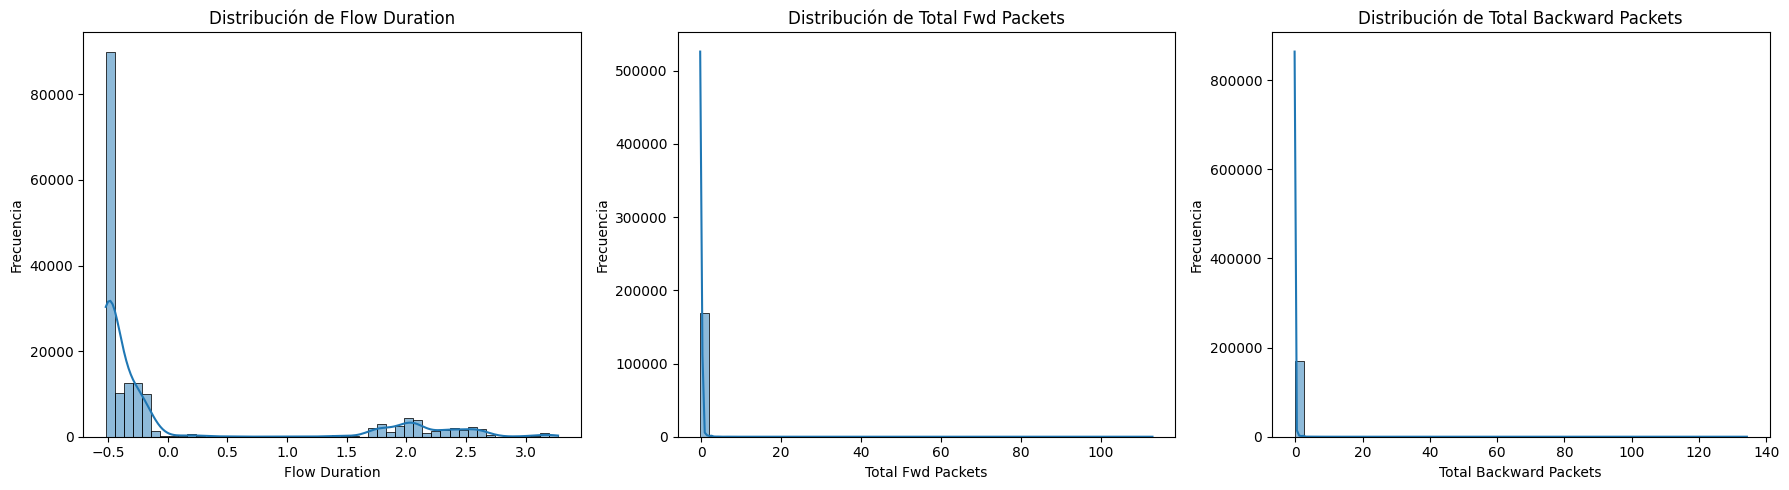

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos algunas variables clave a visualizar
columnas_a_visualizar = ["Flow Duration", "Total Fwd Packets", "Total Backward Packets"]

# Creamos gráficos de distribución para cada una
plt.figure(figsize=(18, 5))

for i, columna in enumerate(columnas_a_visualizar):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[columna], bins=50, kde=True)
    plt.title(f"Distribución de {columna}")
    plt.xlabel(columna)
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


### Análisis del Output: Distribución de Características Clave

Aunque el dataset ha sido previamente normalizado usando `StandardScaler`, es útil observar la forma de las distribuciones resultantes. A pesar de la estandarización, se mantienen los patrones originales de asimetría y dispersión.

1. **Flow Duration**  
   La duración de los flujos presenta una distribución muy sesgada hacia la izquierda, con una gran concentración de flujos muy cortos y una cola larga que representa conexiones mucho más largas. Esto es típico en entornos reales, donde predominan las comunicaciones breves.

2. **Total Fwd Packets / Total Backward Packets**  
   Ambas variables muestran una fuerte concentración de valores bajos (entre 0 y 10 paquetes), acompañados de colas largas que alcanzan más de 100 paquetes. Esto indica que la mayoría de los flujos contienen pocos paquetes, pero existen algunos significativamente más intensos, lo cual podría estar relacionado con tráfico anómalo o ataques.

### Conclusión

Estas distribuciones, aunque escaladas, siguen mostrando comportamientos propios del tráfico de red real: altamente asimétrico, con la presencia de posibles valores extremos. No es necesario corregir estos valores, pero es importante que el modelo sea capaz de manejarlos correctamente durante el entrenamiento.


## 6. Detección Visual de Outliers

A través de diagramas de caja (boxplots) podemos visualizar los posibles valores atípicos en las variables numéricas. Un outlier es un valor que se encuentra significativamente alejado del rango intercuartílico (IQR), y aparece en los boxplots como puntos separados del resto de la caja.

Se observan outliers evidentes en variables como:

- `Flow Duration`: Muchos valores muy por encima del rango central.
- `Total Fwd Packets` y `Total Backward Packets`: Existen flujos con cantidades de paquetes significativamente mayores al promedio.

Estos valores extremos no necesariamente deben eliminarse, ya que pueden corresponder a comportamientos anómalos reales (como ataques de denegación de servicio). Sin embargo, es importante que el modelo sea robusto frente a ellos.

En resumen, los outliers forman parte natural del tráfico de red y su correcta detección visual nos permite tener un mejor entendimiento del comportamiento general del sistema.


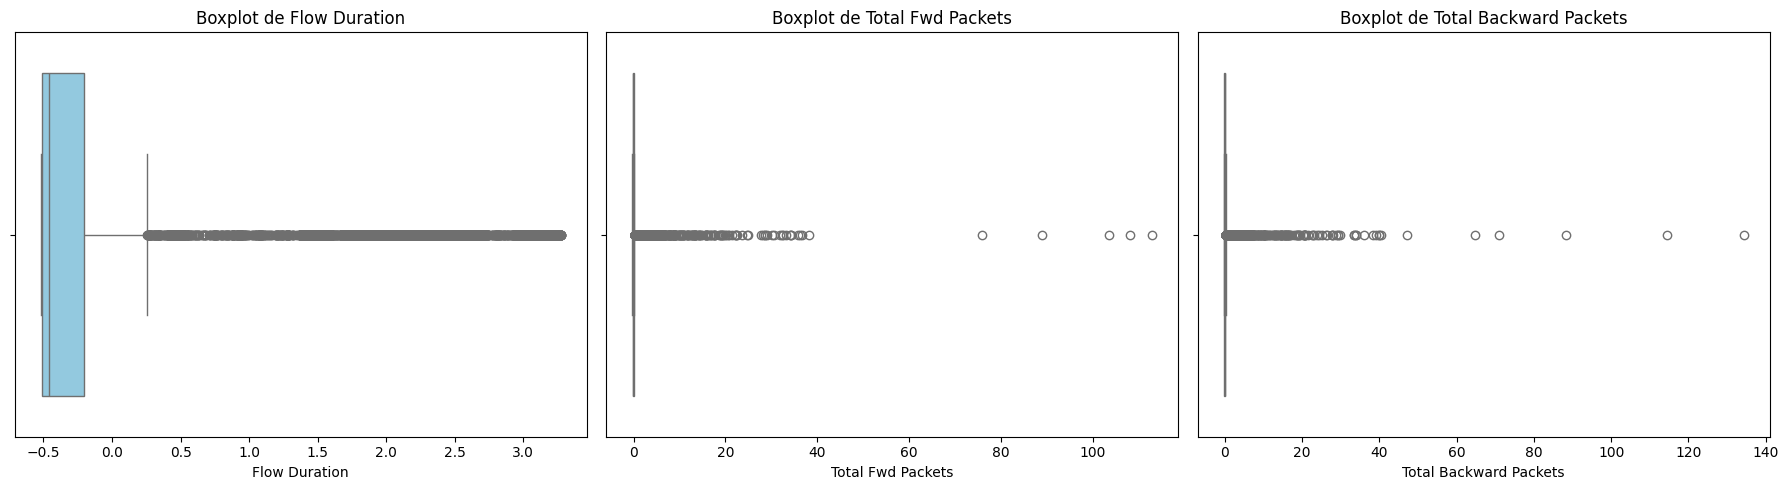

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar algunas variables representativas para visualizar outliers
columnas_boxplot = ["Flow Duration", "Total Fwd Packets", "Total Backward Packets"]

# Crear los boxplots
plt.figure(figsize=(18, 5))

for i, col in enumerate(columnas_boxplot):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, x=col, color="skyblue")
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()
